<a href="https://colab.research.google.com/github/MuhamadAhdanfauzan/PROGLAN-Modul4-latihan_456/blob/main/Statistik_M_Ahdan_F_456.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MUHAMAD AHDAN FAUZAN 202210370311456**

# **STATISTIK & PROBILITAS 3C**

# **APLIKASI PUBG**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Pubg_Stats.csv to Pubg_Stats.csv


# 1. pilih dataset di kaggle

In [3]:
import pandas as pd
df = pd.read_csv('Pubg_Stats.csv')
df.head()

Unnamed: 0    Player_Name  Matches_Played  Kills  Deaths  Assists  \
0           0  StealthMaster             250    587     143       98   
1           1     SniperLion             312    823     218      112   
2           2     NinjaGamer             186    492      84       56   
3           3  ThunderStrike             409    923     267      134   
4           4     SpeedDemon             143    368      68       42   

   Damage_Dealt  Headshots  Wins  Top_10s  Revives  Distance_Traveled  \
0         15243        234    32      145       67              72560   
1         18975        312    42      189       95              89042   
2         11786        156    28       97       48              60924   
3         21037        288    55      258      128              98234   
4          9865        123    20       72       36              52072   

   Weapons_Used  Time_Survived      Rank  
0            12          28976      Gold  
1            15          33652   Diamond  
2            10          21764  Platinum  
3            18          40128    Silver  
4             8          16834      Gold

# 3. interpretasi variabel mana yang berdistribusi normal dan mana yang tidak


Kills:
Test Shapiro-Wilk p-value: 0.02635950595140457
Variabel Kills berdistribusi normal karena p-value <= 0.05

Deaths:
Test Shapiro-Wilk p-value: 0.0013990039005875587
Variabel Deaths berdistribusi normal karena p-value <= 0.05

Assists:
Test Shapiro-Wilk p-value: 0.0014426861889660358
Variabel Assists berdistribusi normal karena p-value <= 0.05

Damage_Dealt:
Test Shapiro-Wilk p-value: 0.09995207190513611
Variabel Damage_Dealt berdistribusi tidak normal karena p-value > 0.05

Headshots:
Test Shapiro-Wilk p-value: 0.0016012934502214193
Variabel Headshots berdistribusi normal karena p-value <= 0.05

Wins:
Test Shapiro-Wilk p-value: 0.012518994510173798
Variabel Wins berdistribusi normal karena p-value <= 0.05

Top_10s:
Test Shapiro-Wilk p-value: 3.805748077789772e-11
Variabel Top_10s berdistribusi normal karena p-value <= 0.05

Revives:
Test Shapiro-Wilk p-value: 6.6593002813475355e-12
Variabel Revives berdistribusi normal karena p-value <= 0.05

Distance_Traveled:
Test Shapiro-Wilk

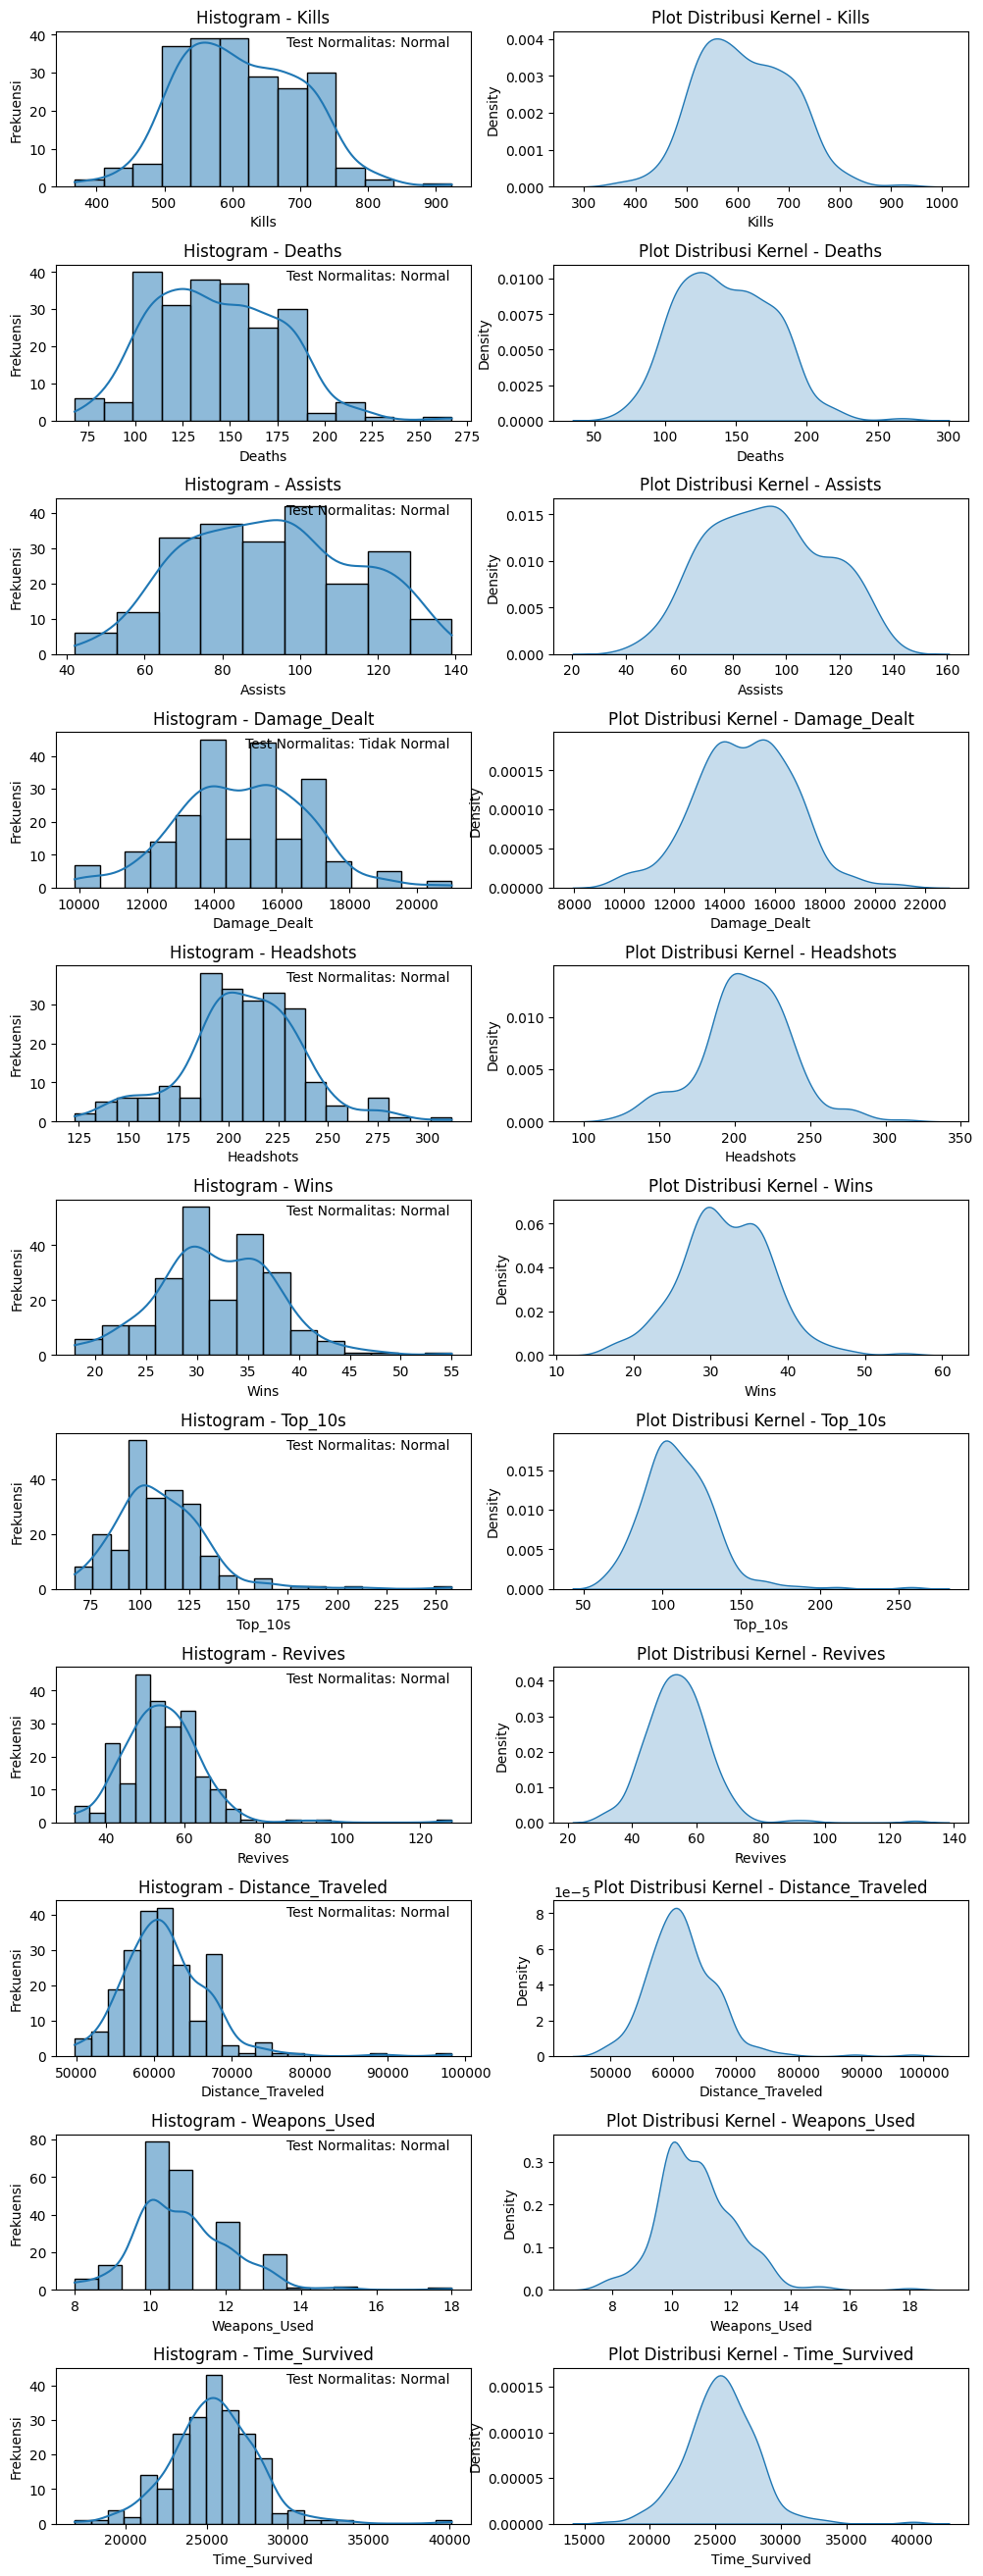

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Baca data dari file CSV
file_path = 'Pubg_Stats.csv'
df = pd.read_csv(file_path)

# Daftar variabel yang ingin diuji
variabel_list = df.columns[3:-1]  # Hanya variabel numerik yang diuji, dimulai dari kolom ke-3

# Set up subplots
fig, axes = plt.subplots(nrows=len(variabel_list), ncols=2, figsize=(12, 3 * len(variabel_list)))
plt.subplots_adjust(hspace=0.5)

for i, var_name in enumerate(variabel_list):
    # Plot histogram
    sns.histplot(df[var_name], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram - {var_name}')
    axes[i, 0].set_xlabel(var_name)
    axes[i, 0].set_ylabel('Frekuensi')

    # Plot distribusi kernel
    sns.kdeplot(df[var_name], fill=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Plot Distribusi Kernel - {var_name}')
    axes[i, 1].set_xlabel(var_name)
    axes[i, 1].set_ylabel('Density')

    # Uji normalitas menggunakan Shapiro-Wilk
    _, p_value = shapiro(df[var_name])
    test_result = "Tidak Normal" if p_value > 0.05 else "Normal"

    # Tambahkan informasi pada subplot
    axes[i, 0].text(0.95, 0.9, f'Test Normalitas: {test_result}', transform=axes[i, 0].transAxes, horizontalalignment='right')

    # Print alasan mengapa variabel berdistribusi normal atau tidak
    print(f'\n{var_name}:')
    print(f'Test Shapiro-Wilk p-value: {p_value}')
    if p_value > 0.05:
        print(f'Variabel {var_name} berdistribusi tidak normal karena p-value > 0.05')
    else:
        print(f'Variabel {var_name} berdistribusi normal karena p-value <= 0.05')

# Tampilkan plot
plt.show()


In [ ]:
pip install matplotlib seaborn


# 2. plotting masing-masing variabel (grafik gaussian/ grafik lengkung/ kernel distribution)

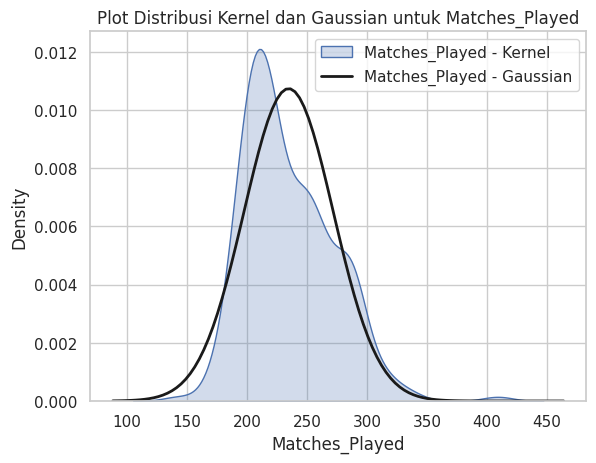

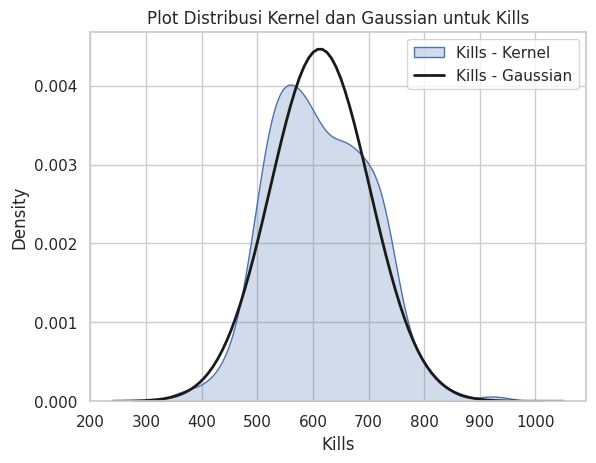

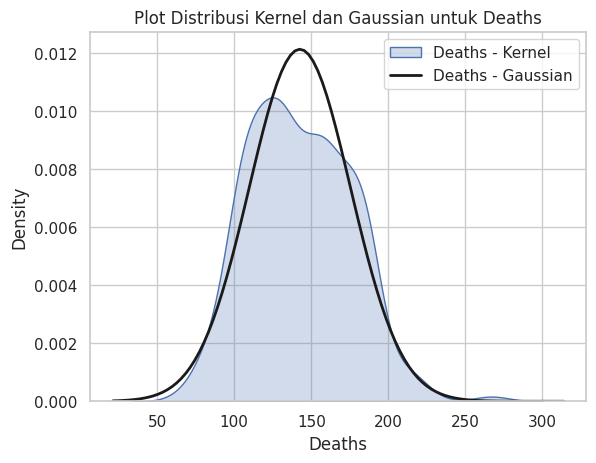

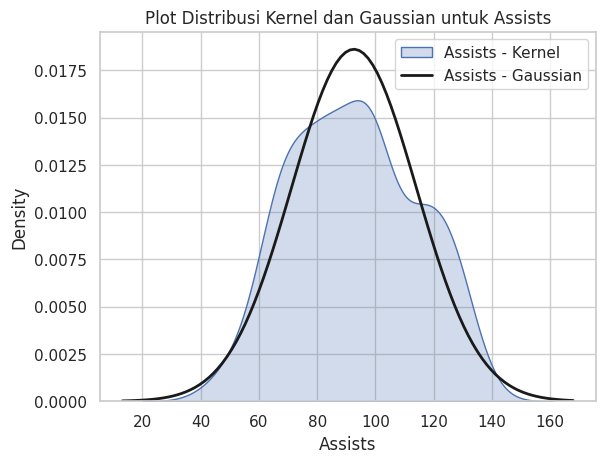

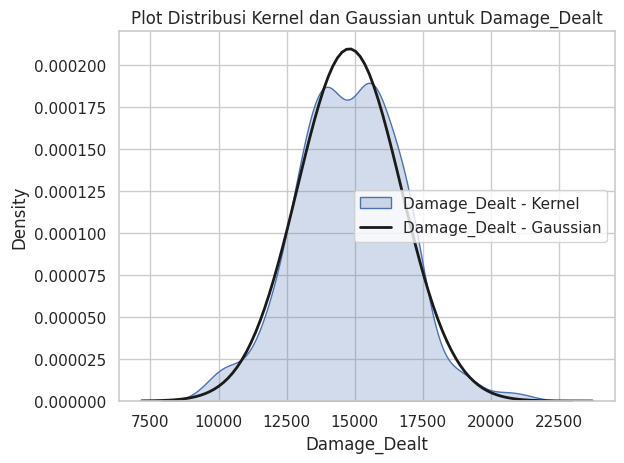

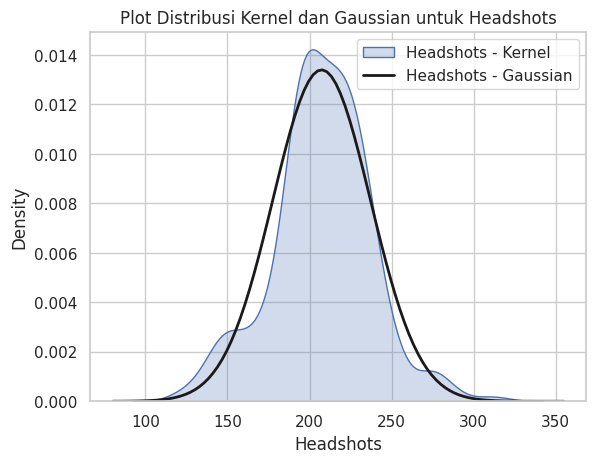

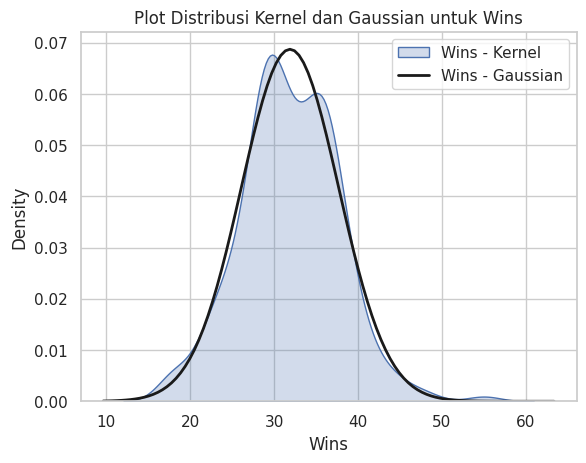

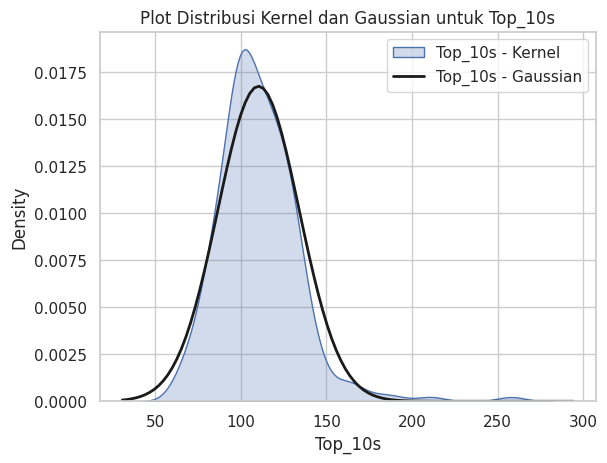

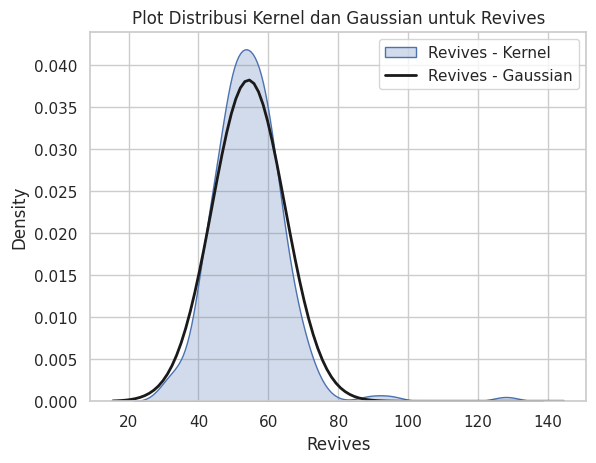

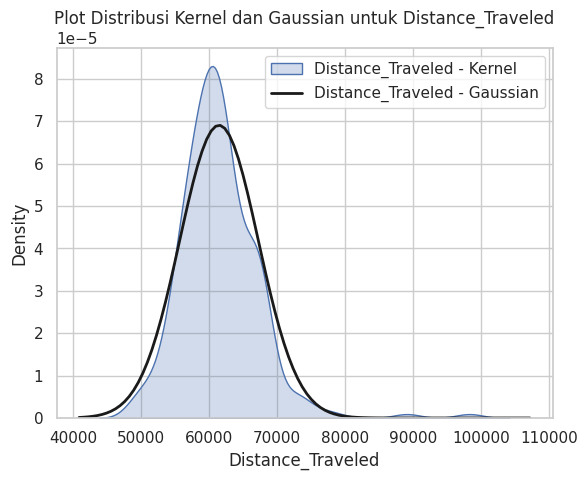

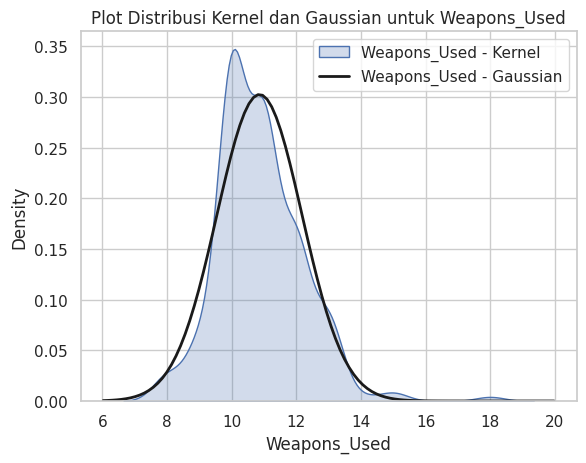

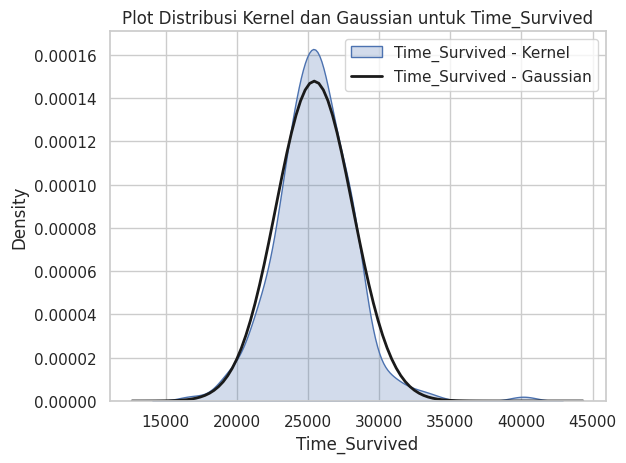

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import numpy as np

# Baca data ke dalam DataFrame
df = pd.read_csv('Pubg_Stats.csv')

# Daftar variabel yang ingin dianalisis
variabel_list = ['Matches_Played', 'Kills', 'Deaths', 'Assists', 'Damage_Dealt', 'Headshots',
                 'Wins', 'Top_10s', 'Revives', 'Distance_Traveled', 'Weapons_Used', 'Time_Survived']

# Loop untuk setiap variabel
for var_name in variabel_list:
    # Plot distribusi kernel
    sns.kdeplot(df[var_name], fill=True, label=f'{var_name} - Kernel')
    plt.title(f'Plot Distribusi Kernel dan Gaussian untuk {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Density')

    # Overlay Gaussian (kurva normal)
    mu, std = df[var_name].mean(), df[var_name].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    # Tambahkan grafik Gaussian
    plt.plot(x, p, 'k', linewidth=2, label=f'{var_name} - Gaussian')

    plt.legend()
    plt.show()


## 4. Buat python atau excel untuk menormalkan masing masing variabel (metode: z score/minmax)


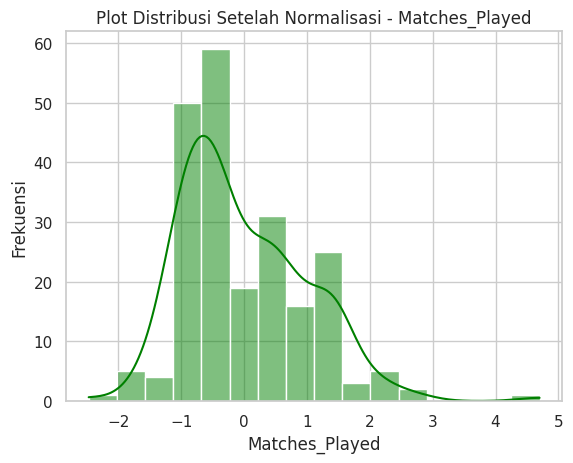

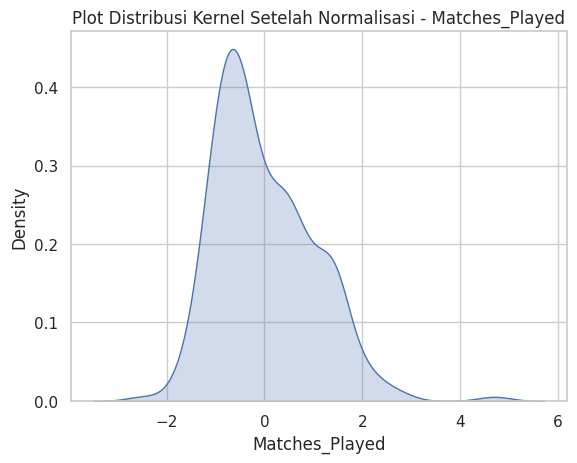

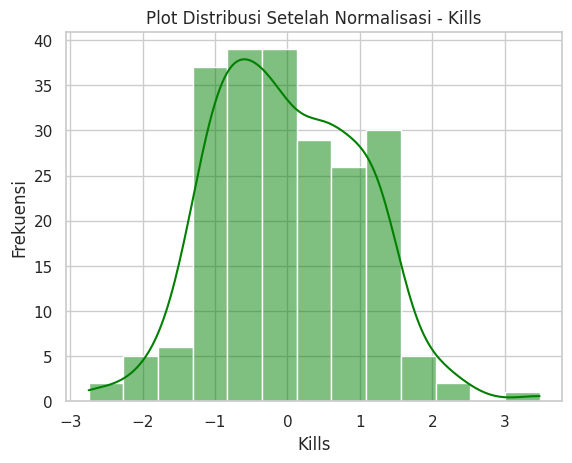

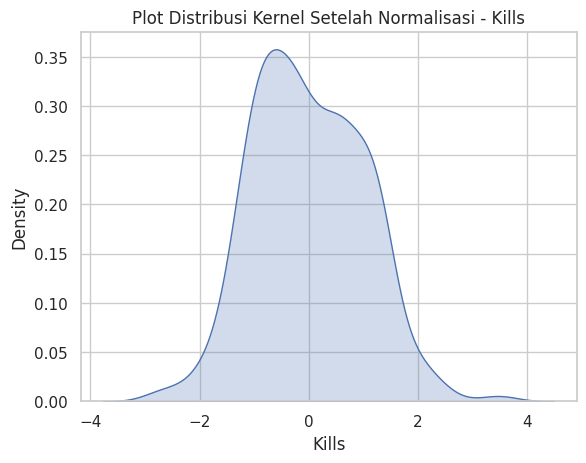

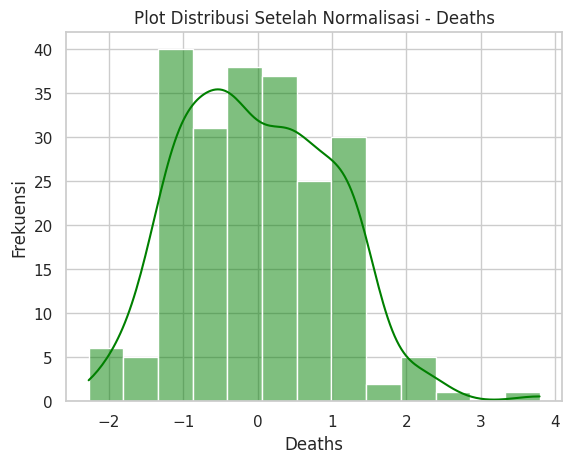

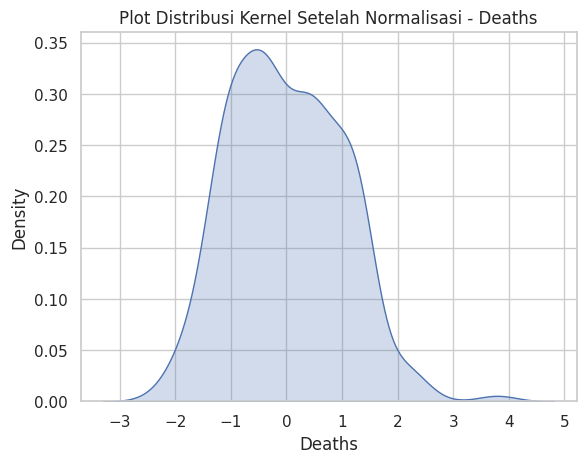

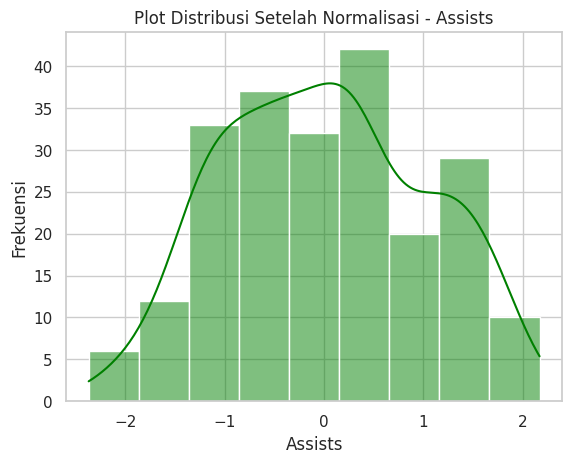

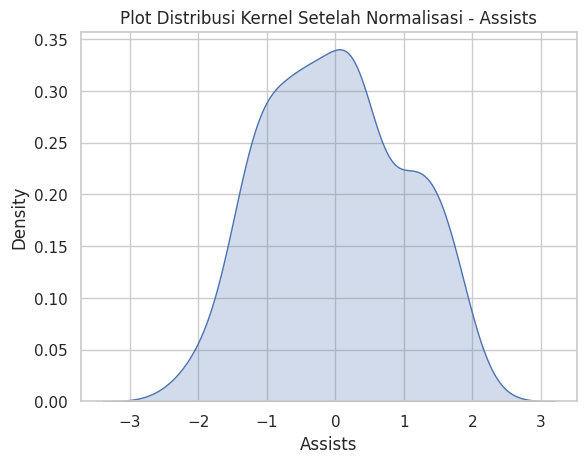

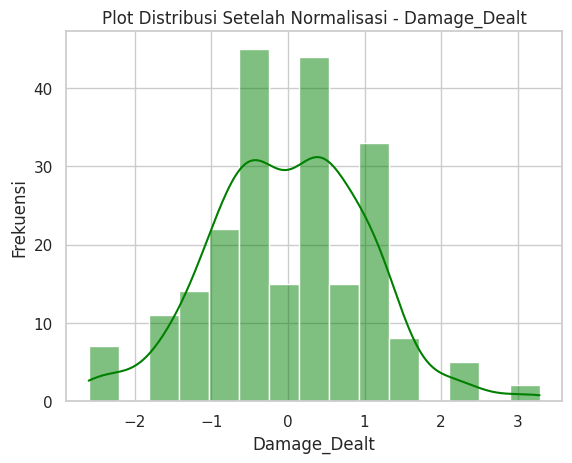

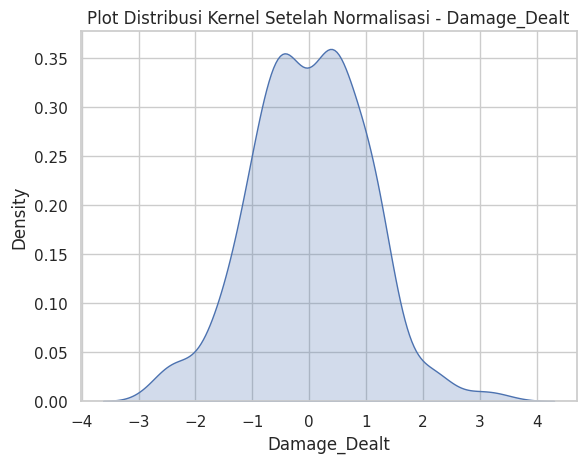

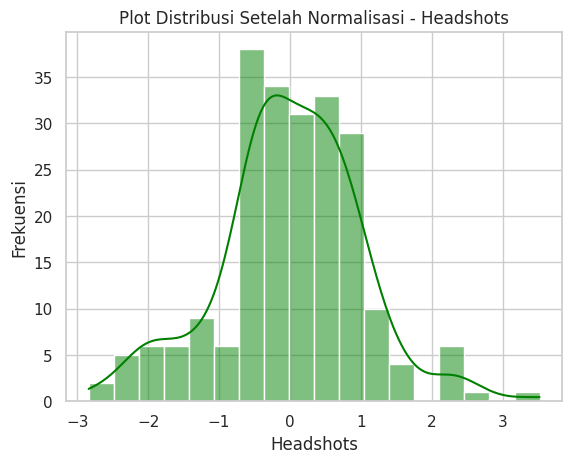

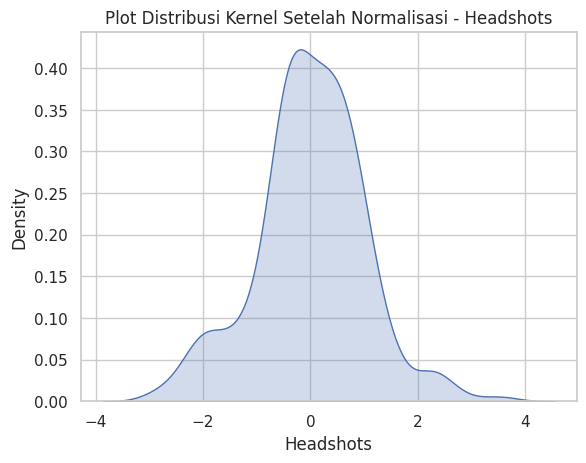

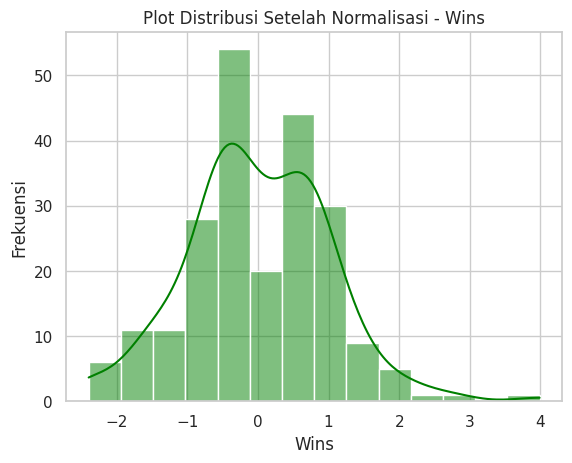

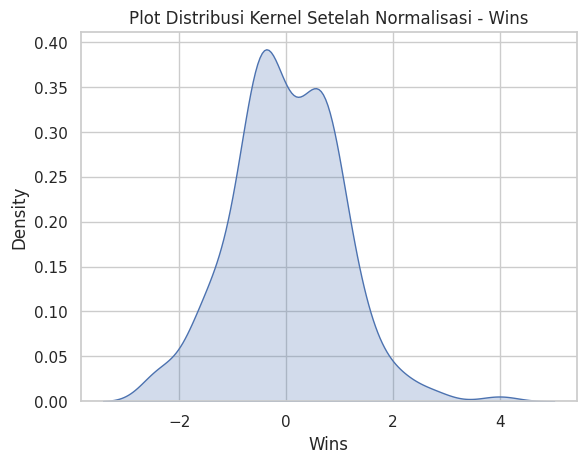

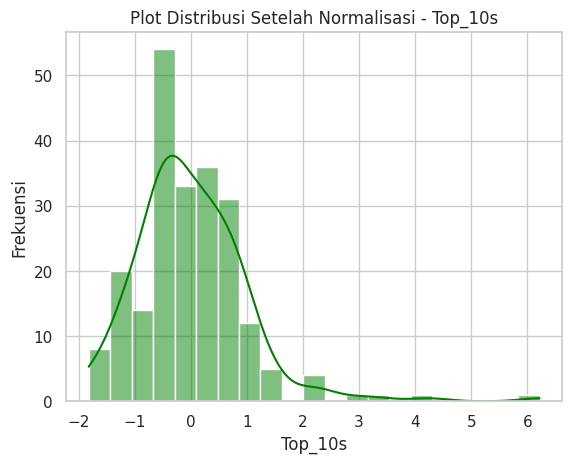

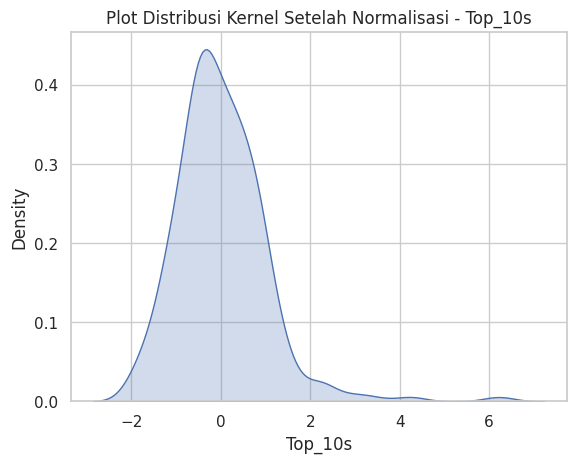

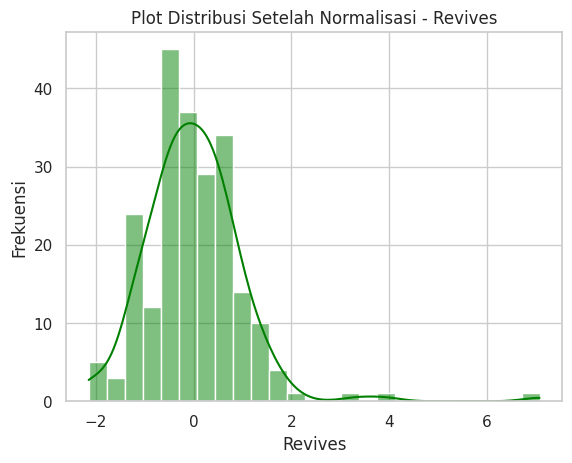

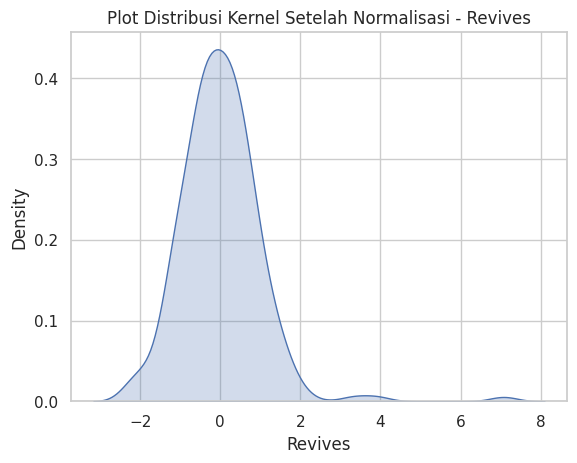

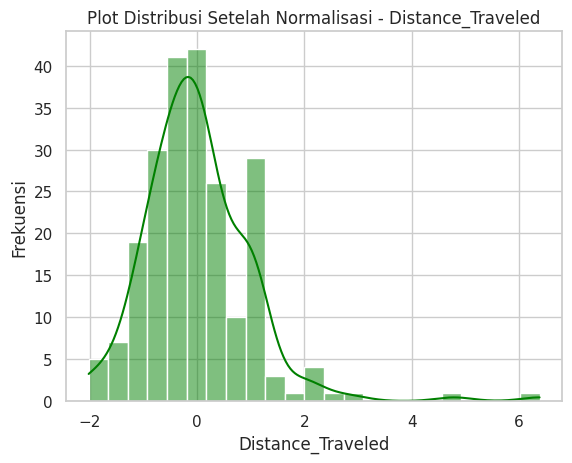

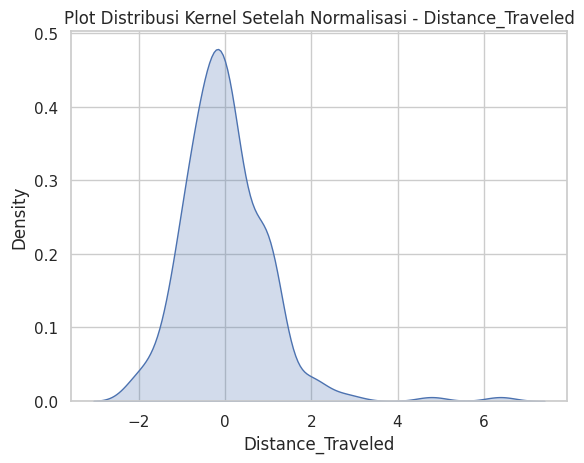

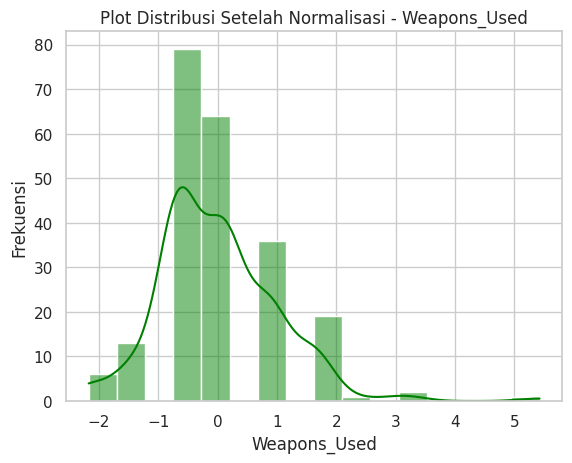

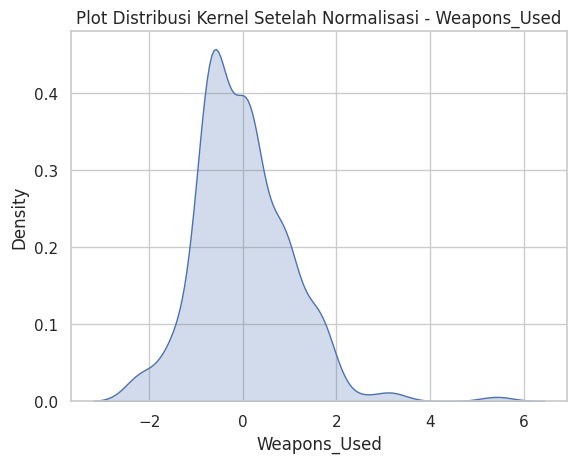

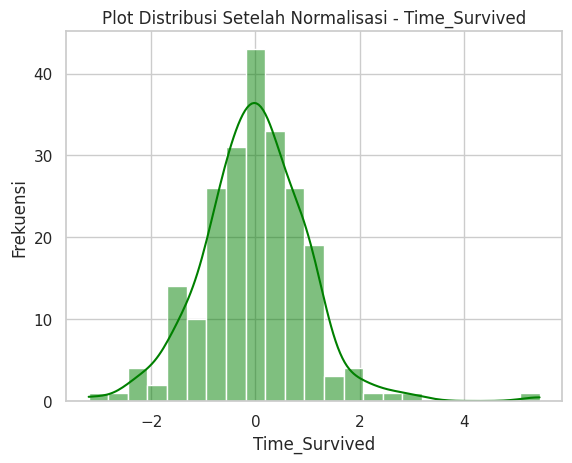

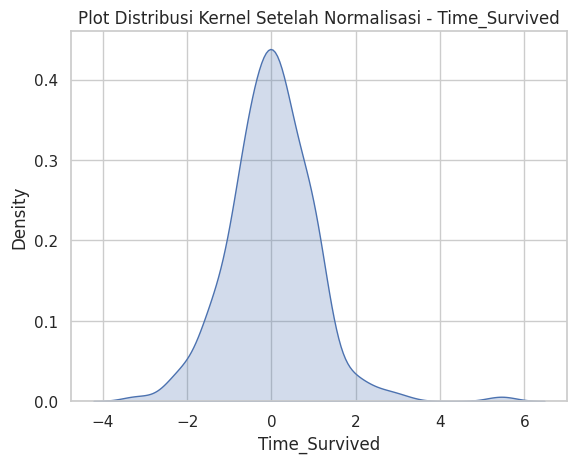

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Baca data ke dalam DataFrame
df = pd.read_csv('Pubg_Stats.csv')

# Daftar variabel yang ingin dinormalisasi
variabel_list = ['Matches_Played', 'Kills', 'Deaths', 'Assists', 'Damage_Dealt', 'Headshots',
                 'Wins', 'Top_10s', 'Revives', 'Distance_Traveled', 'Weapons_Used', 'Time_Survived']

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Normalisasi masing-masing variabel
df[variabel_list] = scaler.fit_transform(df[variabel_list])

# Membuat grafik untuk masing-masing variabel
for var_name in variabel_list:
    # Plot histogram
    sns.histplot(df[var_name], kde=True, color='green')
    plt.title(f'Plot Distribusi Setelah Normalisasi - {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Frekuensi')
    plt.show()

    # Plot distribusi kernel
    sns.kdeplot(df[var_name], fill=True)
    plt.title(f'Plot Distribusi Kernel Setelah Normalisasi - {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.show()


## 5.  plotting lagi dengan hasil normalisasi yang baru masing-masing variabel

Data setelah dinormalisasi:
     Unnamed: 0      Player_Name  Matches_Played     Kills    Deaths  \
0             0    StealthMaster             250  0.394595  0.376884   
1             1       SniperLion             312  0.819820  0.753769   
2             2       NinjaGamer             186  0.223423  0.080402   
3             3    ThunderStrike             409  1.000000  1.000000   
4             4       SpeedDemon             143  0.000000  0.000000   
..          ...              ...             ...       ...       ...   
216         216     CrimsonRider             294  0.675676  0.597990   
217         217  BlazingSorcerer             203  0.275676  0.206030   
218         218      FrozenFlare             206  0.333333  0.246231   
219         219    AbyssGuardian             220  0.412613  0.381910   
220         220  SpectralPhantom             225  0.461261  0.407035   

      Assists  Damage_Dealt  Headshots      Wins   Top_10s   Revives  \
0    0.577320      0.481382   0.587

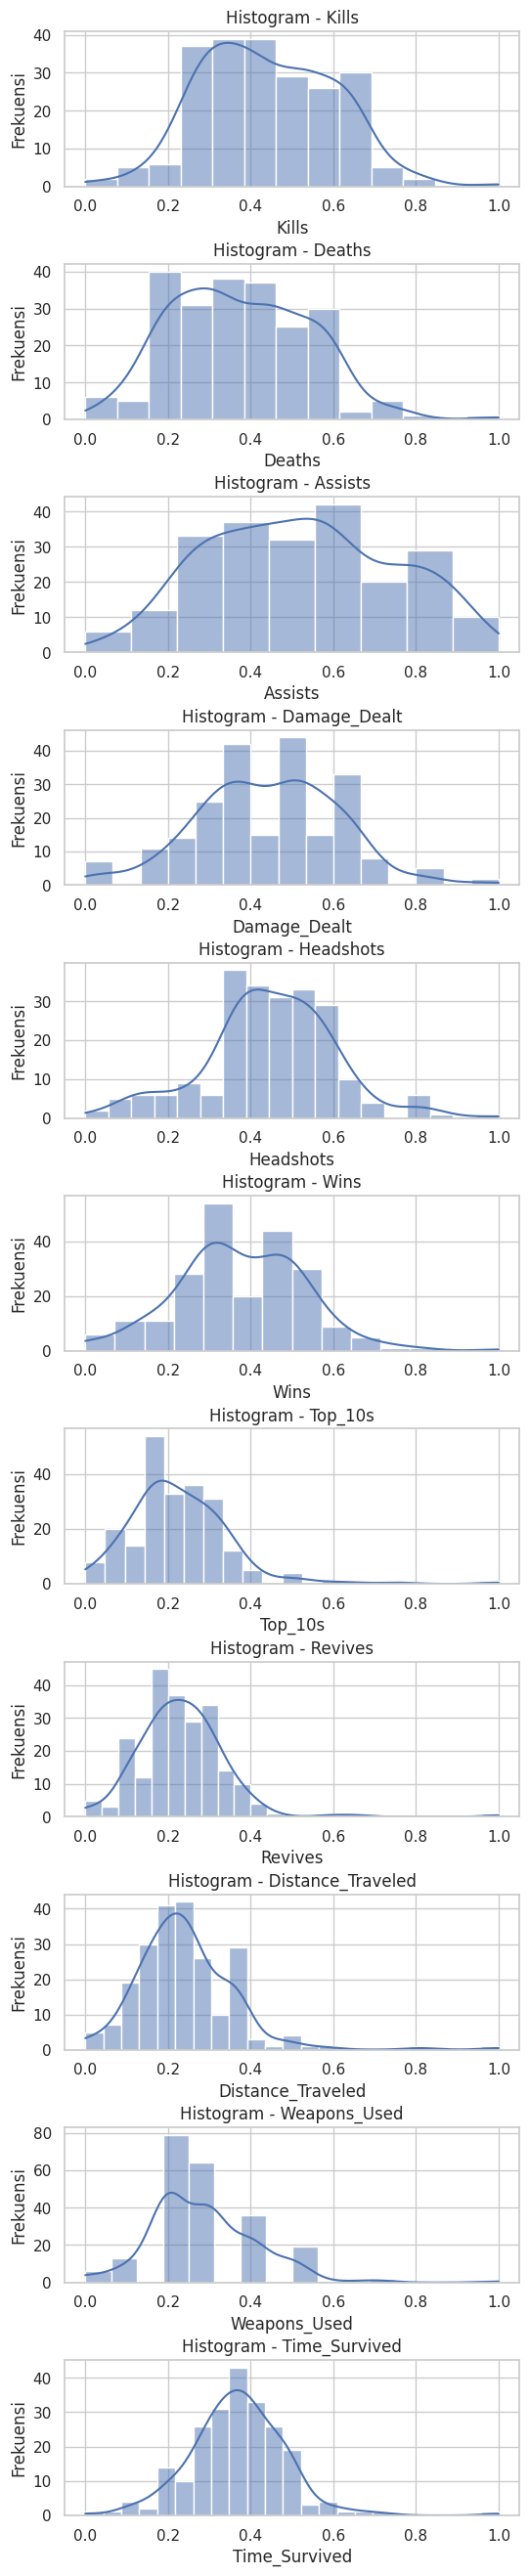

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Baca data dari file CSV
file_path = 'Pubg_Stats.csv'
df = pd.read_csv(file_path)

# Daftar variabel yang ingin dinormalisasi
variabel_list = df.columns[3:-1]  # Hanya variabel numerik yang diuji, dimulai dari kolom ke-3

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi masing-masing variabel
df[variabel_list] = scaler.fit_transform(df[variabel_list])

# Tampilkan DataFrame hasil normalisasi
print("Data setelah dinormalisasi:")
print(df)

# Set up subplots
fig, axes = plt.subplots(nrows=len(variabel_list), figsize=(6, 3 * len(variabel_list)))
plt.subplots_adjust(hspace=0.5)

# Plotting data setelah dinormalisasi
for i, var_name in enumerate(variabel_list):
    sns.histplot(df[var_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram - {var_name}')
    axes[i].set_xlabel(var_name)
    axes[i].set_ylabel('Frekuensi')

# Tampilkan plot
plt.show()


# 6. interpretasi perbandingan variabel yang belum dinormalisasi dan yang sudah dinormalisasi


Kills:
Sebelum normalisasi: Rata-rata jumlah kills sekitar 612.6742081447964, dengan variasi sekitar 89.31121641323124.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Kills:
  Sebelum normalisasi, nilai variabel Kills memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


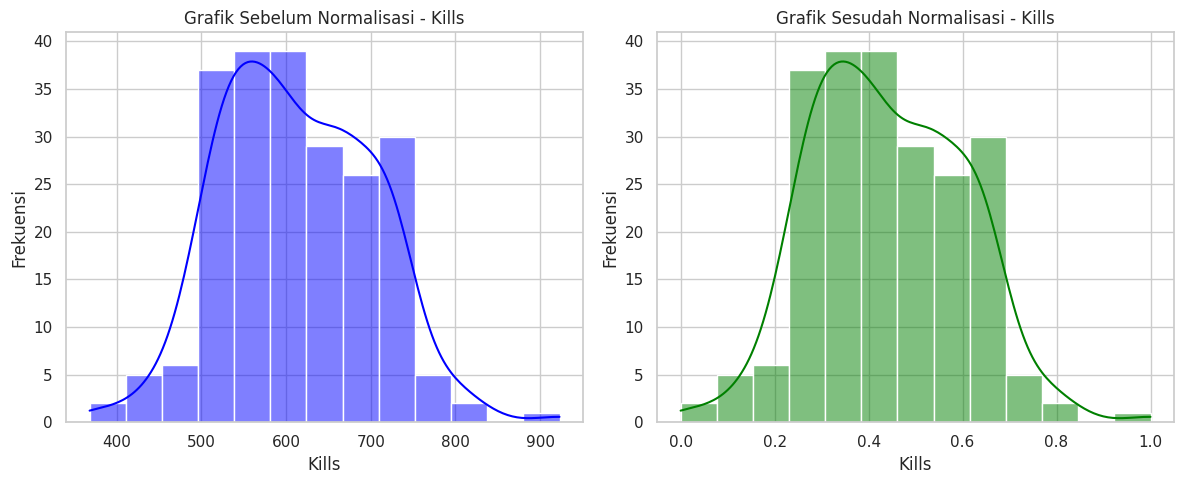

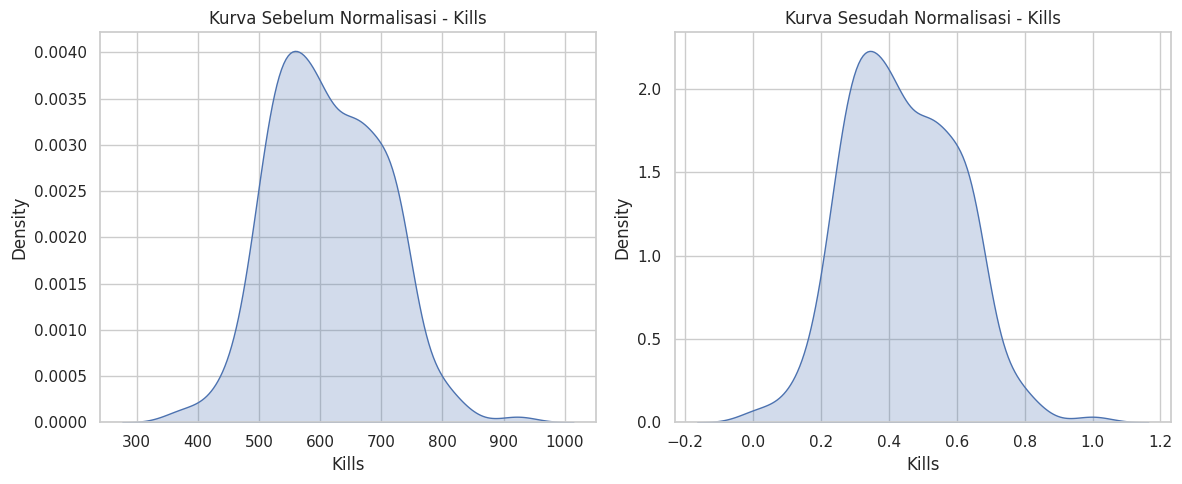


Deaths:
Sebelum normalisasi: Rata-rata jumlah deaths sekitar 142.579185520362, dengan variasi sekitar 32.88256406263976.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Deaths:
  Sebelum normalisasi, nilai variabel Deaths memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


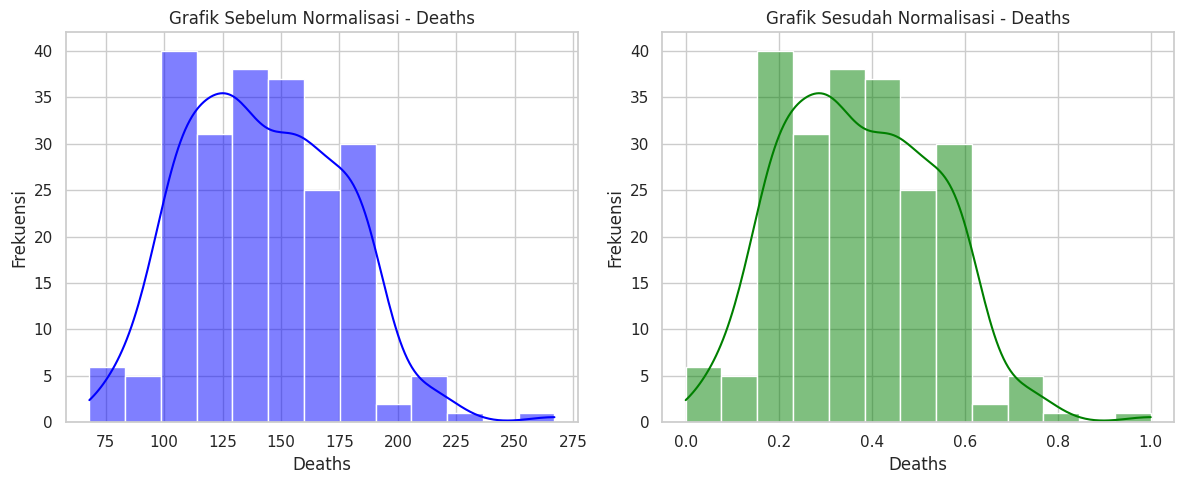

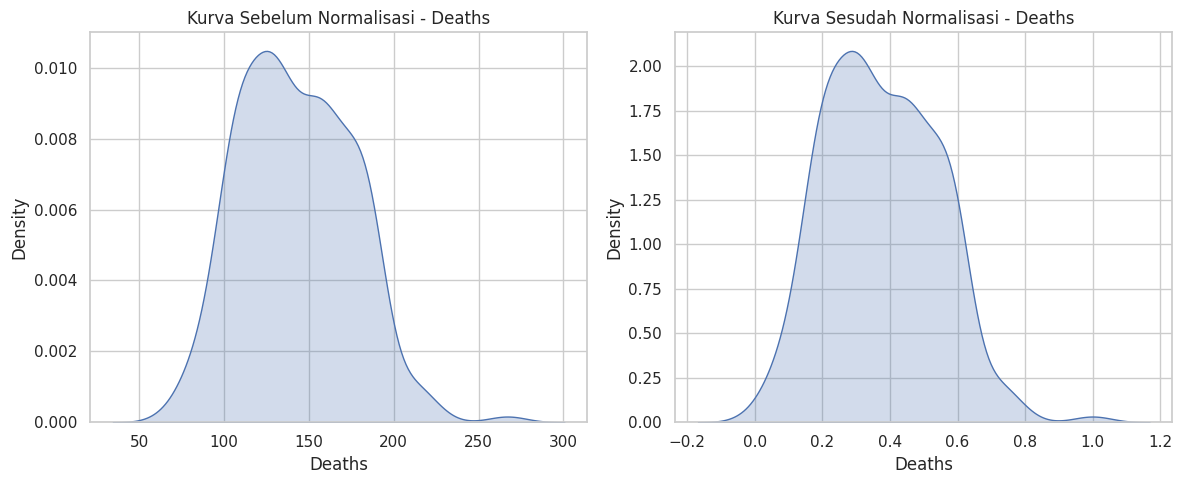


Assists:
Sebelum normalisasi: Rata-rata jumlah assists sekitar 92.61538461538461, dengan variasi sekitar 21.42304490838903.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Assists:
  Sebelum normalisasi, nilai variabel Assists memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


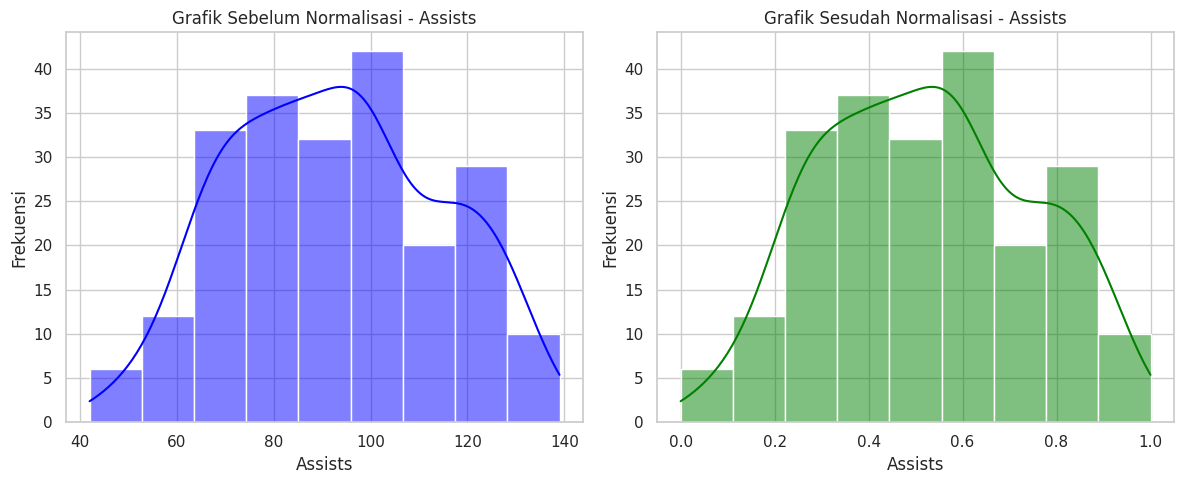

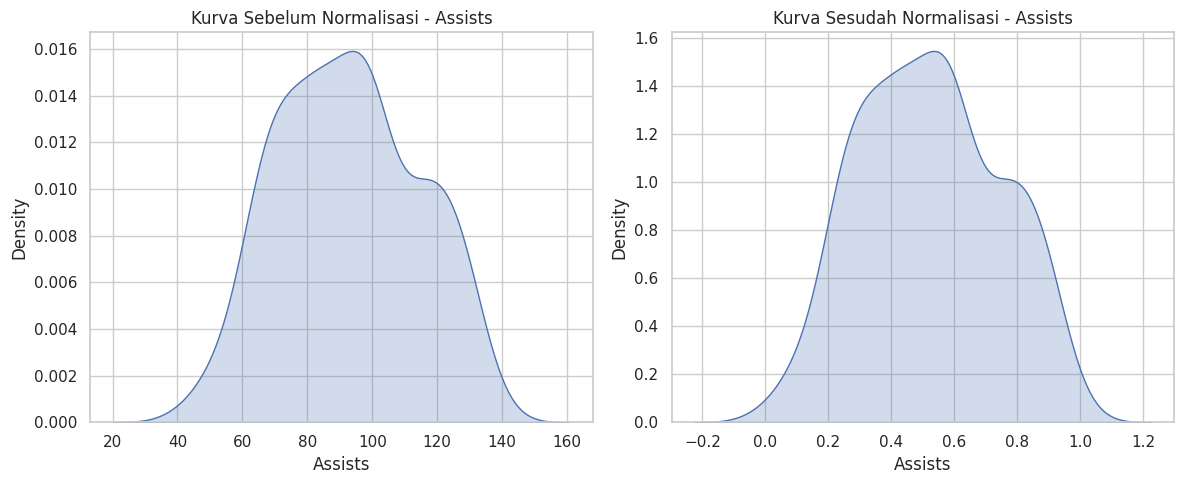


Damage_Dealt:
Sebelum normalisasi: Rata-rata jumlah damage_dealt sekitar 14801.004524886877, dengan variasi sekitar 1902.9479749677807.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Damage_Dealt:
  Sebelum normalisasi, nilai variabel Damage_Dealt memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


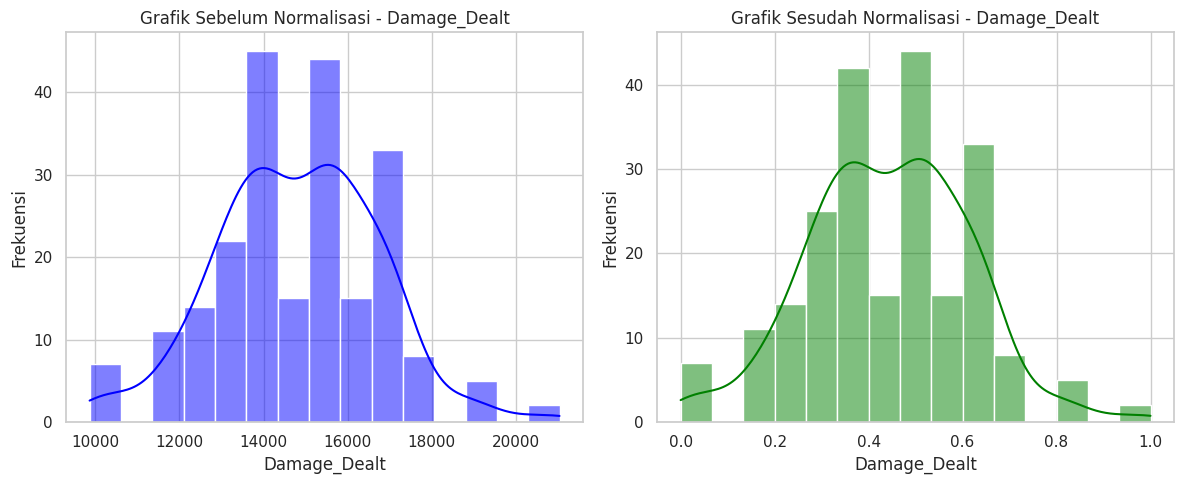

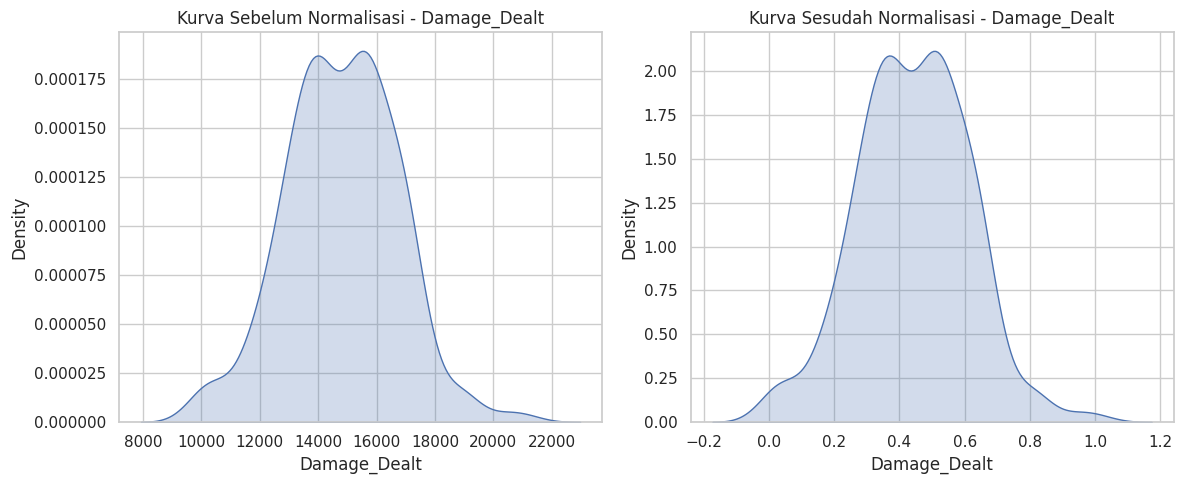


Headshots:
Sebelum normalisasi: Rata-rata jumlah headshots sekitar 207.36199095022624, dengan variasi sekitar 29.7759085598333.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Headshots:
  Sebelum normalisasi, nilai variabel Headshots memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


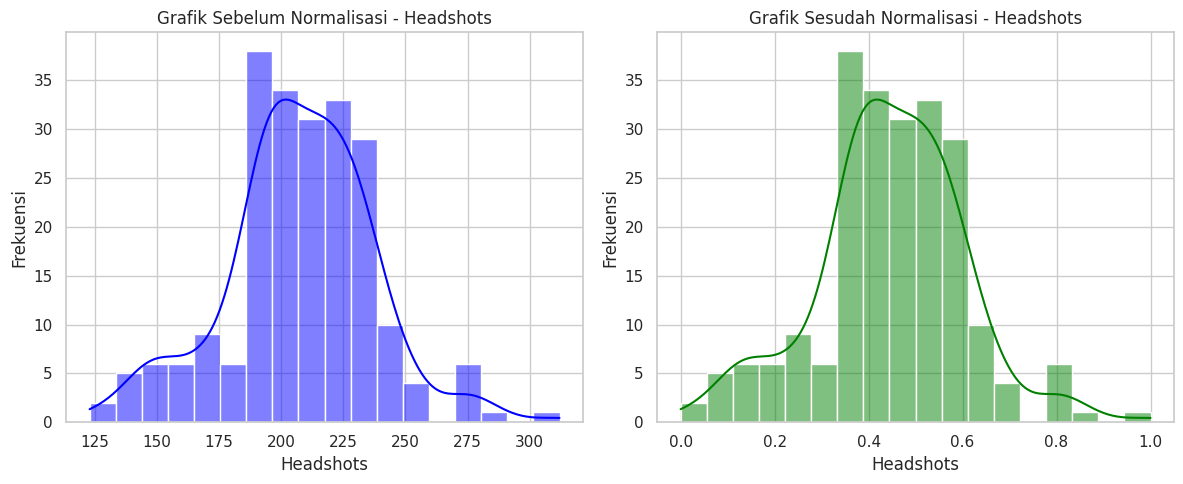

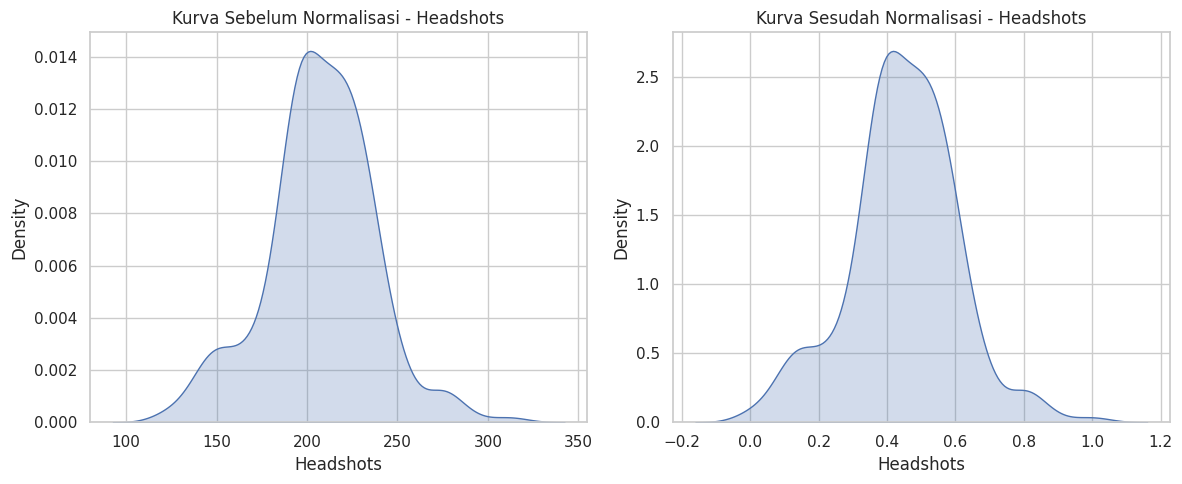


Wins:
Sebelum normalisasi: Rata-rata jumlah wins sekitar 31.895927601809955, dengan variasi sekitar 5.806190401334843.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Wins:
  Sebelum normalisasi, nilai variabel Wins memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


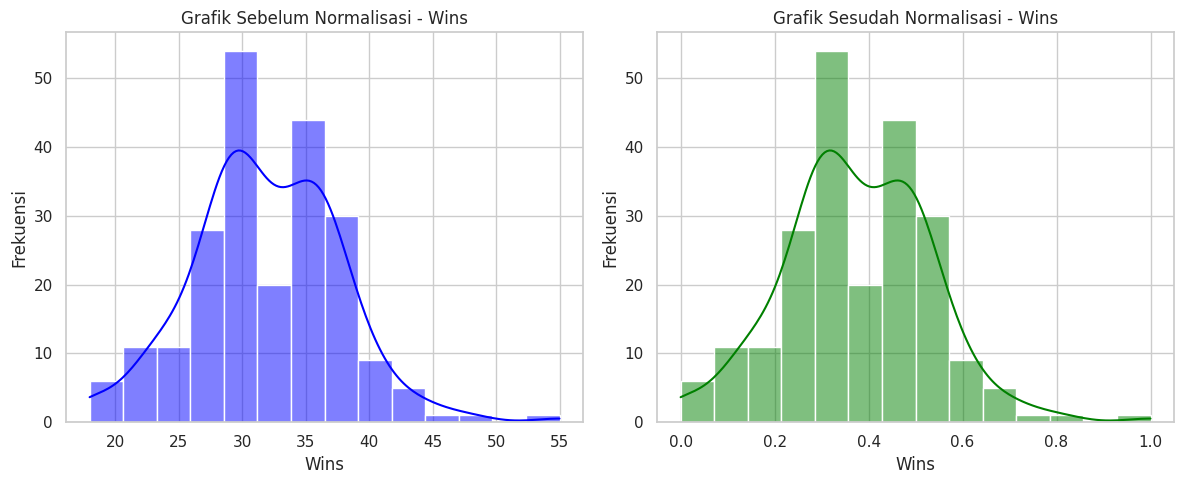

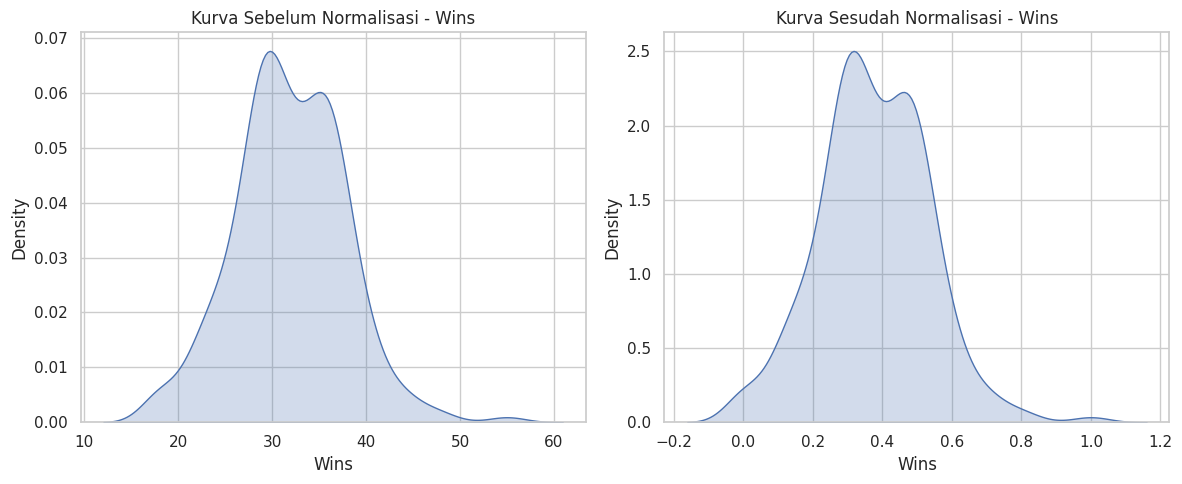


Top_10s:
Sebelum normalisasi: Rata-rata jumlah top_10s sekitar 110.35746606334841, dengan variasi sekitar 23.79464800222898.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Top_10s:
  Sebelum normalisasi, nilai variabel Top_10s memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


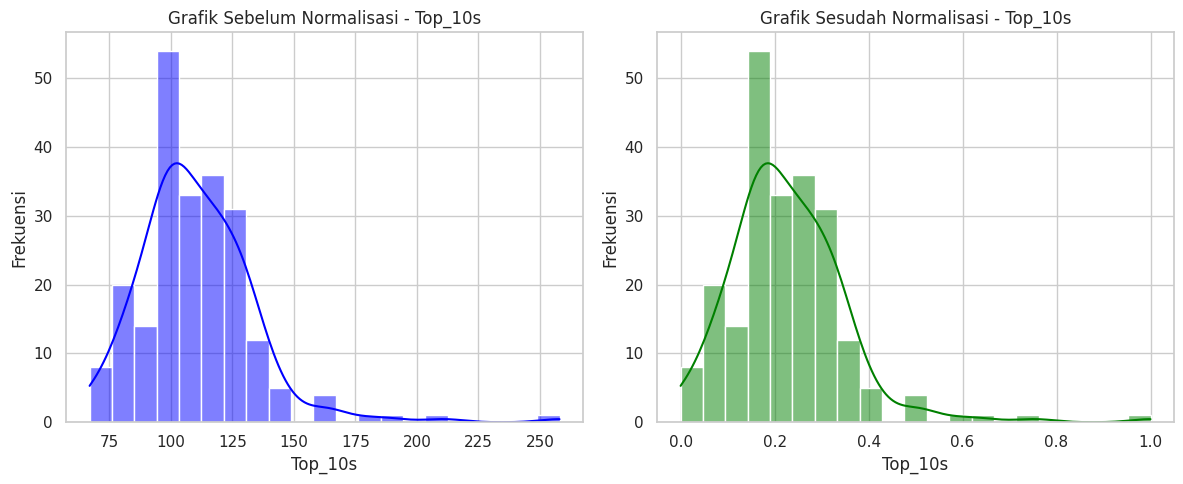

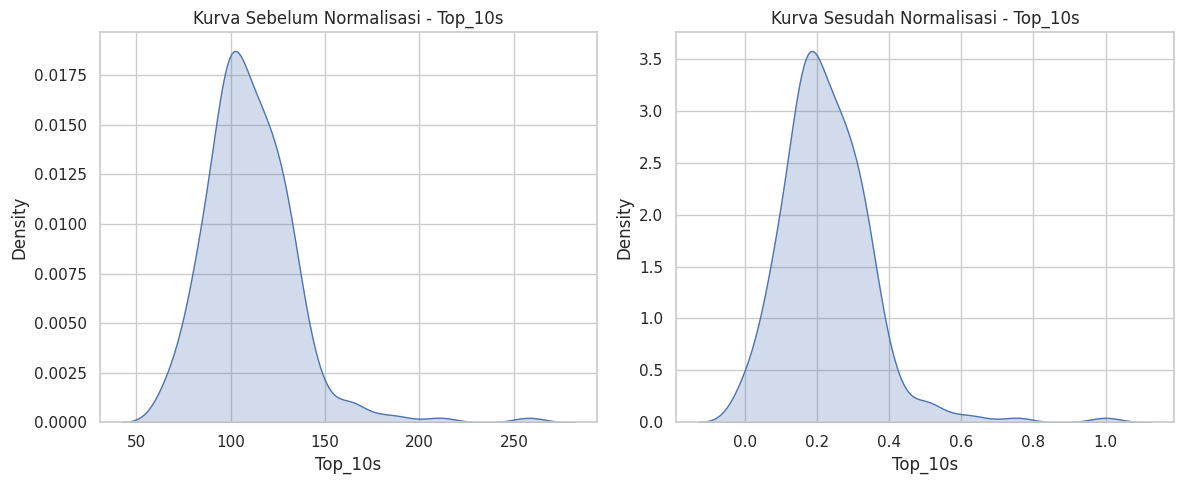


Revives:
Sebelum normalisasi: Rata-rata jumlah revives sekitar 54.33031674208145, dengan variasi sekitar 10.436144986150092.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Revives:
  Sebelum normalisasi, nilai variabel Revives memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


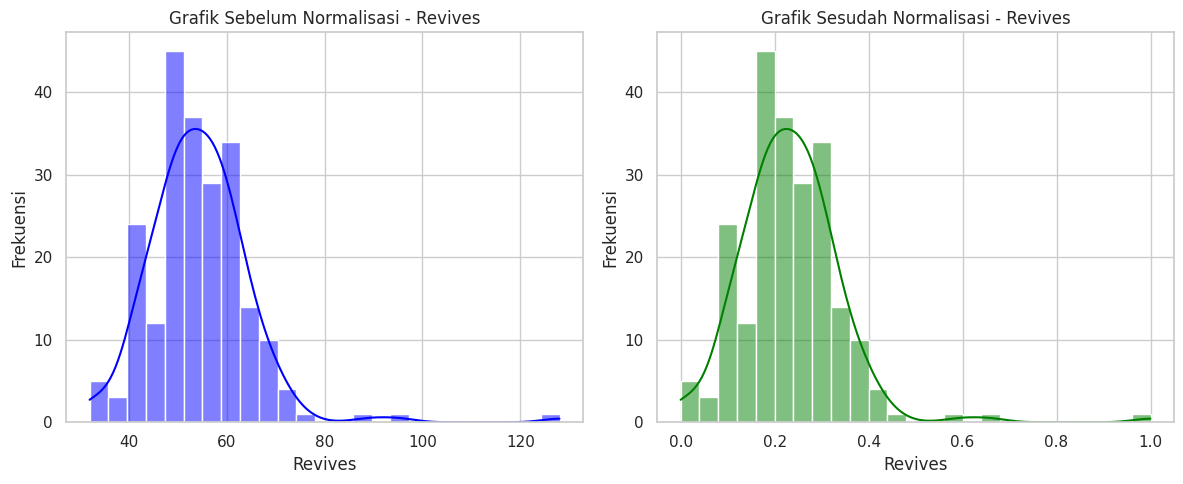

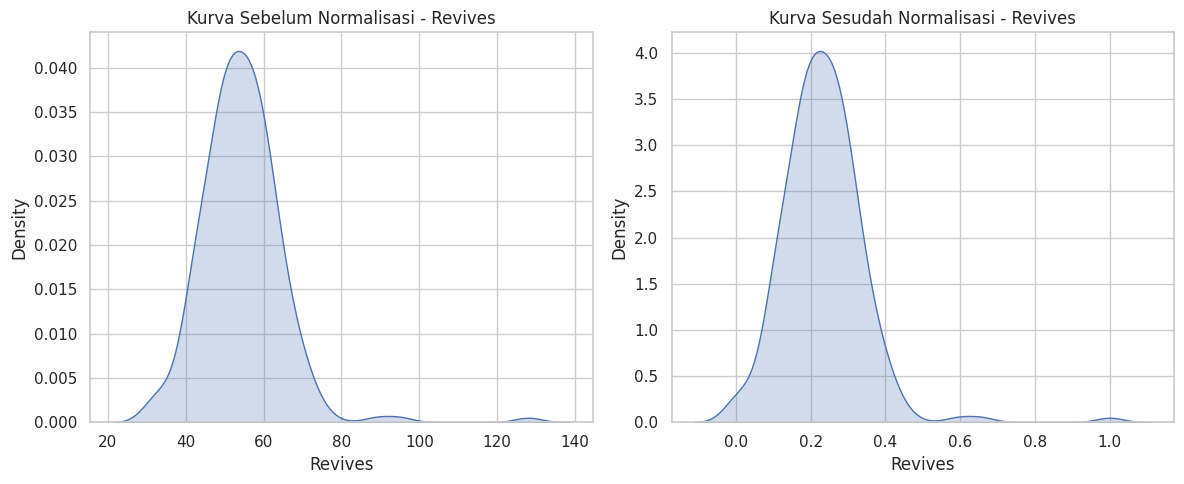


Distance_Traveled:
Sebelum normalisasi: Rata-rata jumlah distance_traveled sekitar 61449.31674208145, dengan variasi sekitar 5775.529198825953.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Distance_Traveled:
  Sebelum normalisasi, nilai variabel Distance_Traveled memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


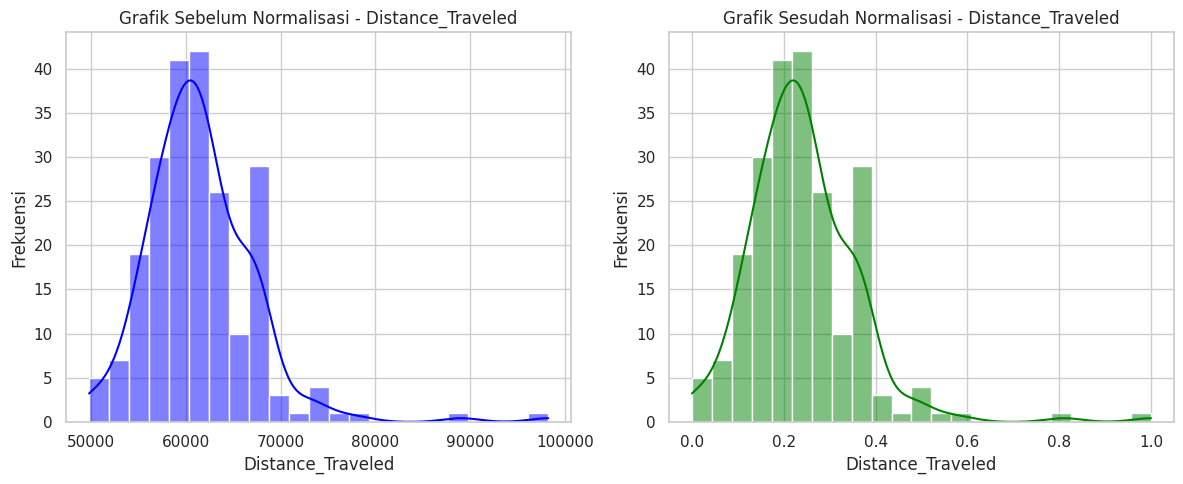

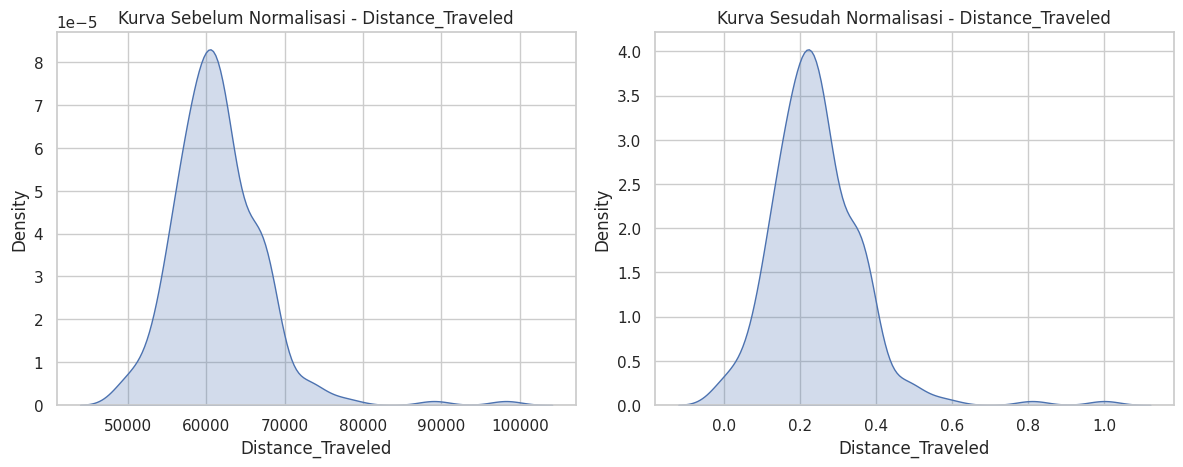


Weapons_Used:
Sebelum normalisasi: Rata-rata jumlah weapons_used sekitar 10.85972850678733, dengan variasi sekitar 1.3188348571757766.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Weapons_Used:
  Sebelum normalisasi, nilai variabel Weapons_Used memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


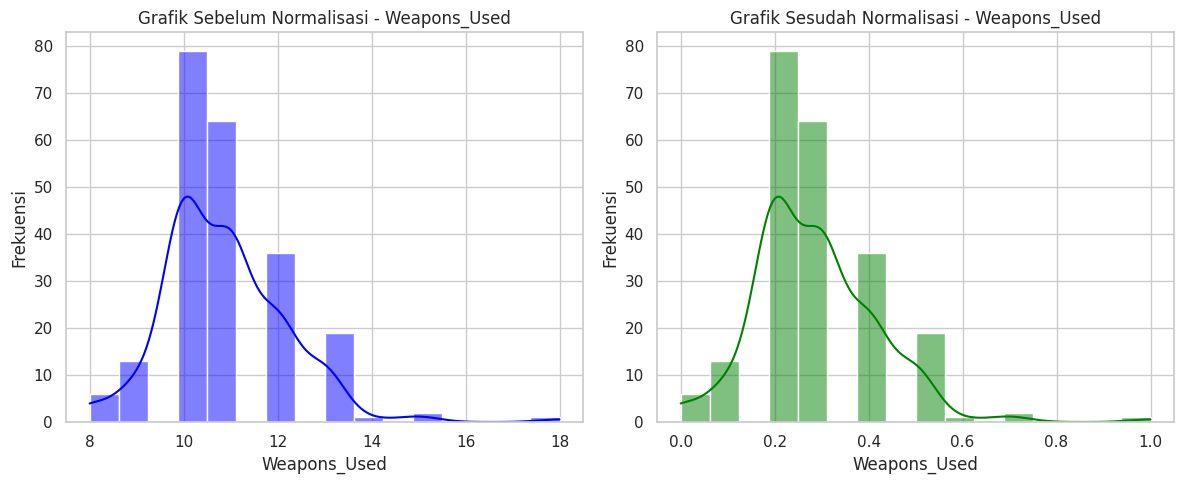

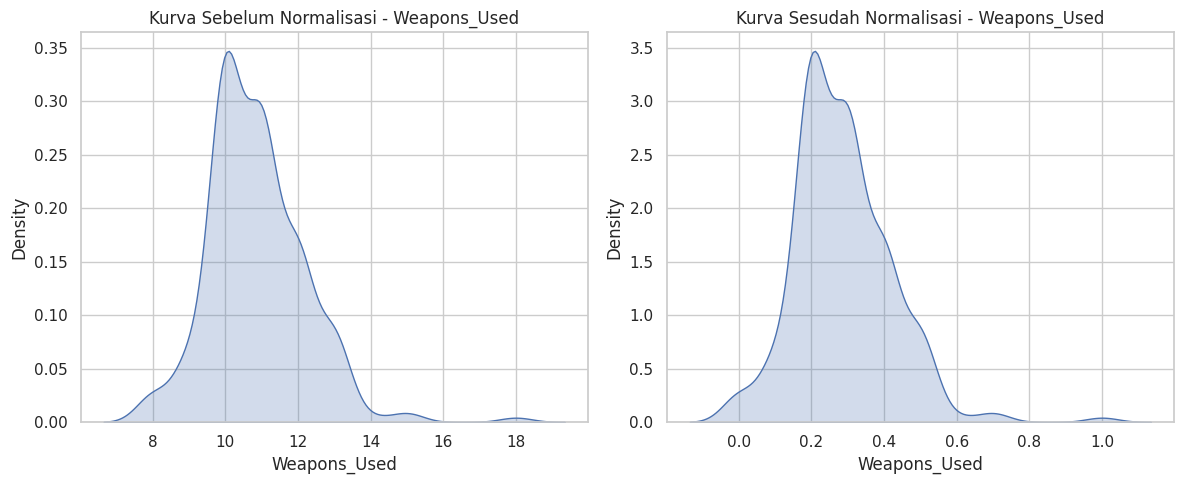


Time_Survived:
Sebelum normalisasi: Rata-rata jumlah time_survived sekitar 25444.42081447964, dengan variasi sekitar 2699.278874965963.
Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.

Interpretasi - Time_Survived:
  Sebelum normalisasi, nilai variabel Time_Survived memiliki skala yang berbeda.
  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.
  Memudahkan perbandingan antar data.


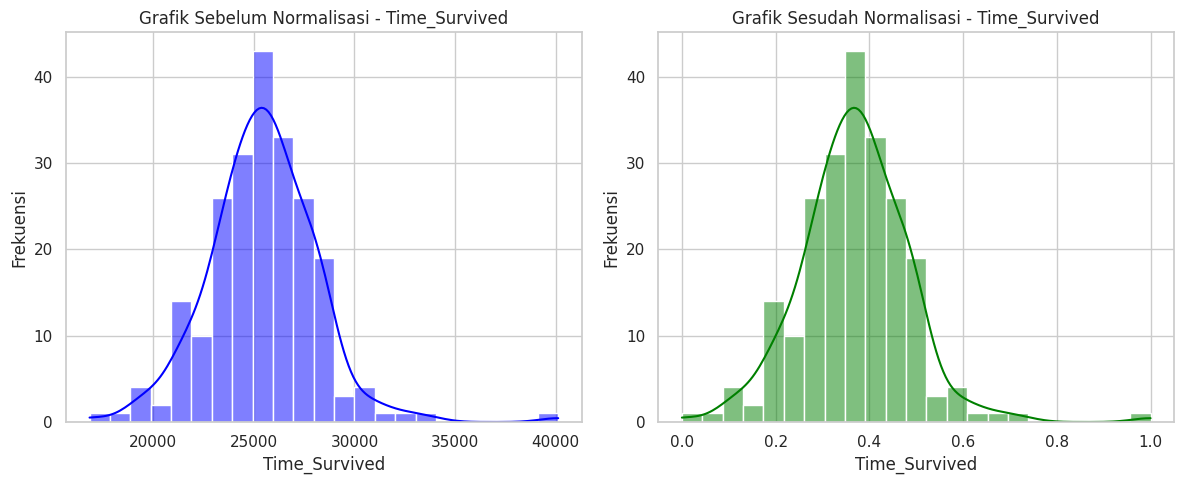

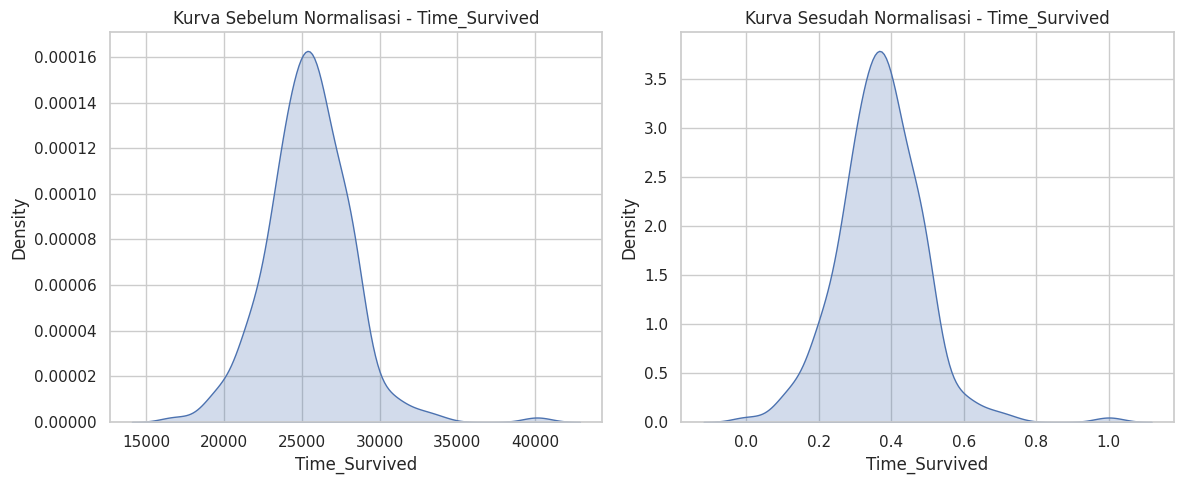

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Baca data dari file CSV
file_path = 'Pubg_Stats.csv'  # Ganti dengan path file CSV yang sesuai
df = pd.read_csv(file_path)

# Daftar variabel yang ingin dinormalisasi
variabel_list = df.columns[3:-1]  # Hanya variabel numerik yang diuji, dimulai dari kolom ke-3

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi masing-masing variabel
df_normalized = df.copy()  # Salin DataFrame agar tidak mengubah data asli
df_normalized[variabel_list] = scaler.fit_transform(df_normalized[variabel_list])

# Print dan plot untuk setiap variabel
for var_name in variabel_list:
    # Statistik Sebelum Normalisasi
    print(f'\n{var_name}:')
    print(f'Sebelum normalisasi: Rata-rata jumlah {var_name.lower()} sekitar {df[var_name].mean()}, dengan variasi sekitar {df[var_name].std()}.')

    # Statistik Setelah Normalisasi
    print(f'Setelah normalisasi: Nilai telah diubah menjadi rentang 0-1. Distribusi masih mirip, tetapi sekarang dalam skala yang seragam, memudahkan perbandingan.')
    print(f'\nInterpretasi - {var_name}:')
    print(f"  Sebelum normalisasi, nilai variabel {var_name} memiliki skala yang berbeda.")
    print(f"  Setelah normalisasi, distribusi nilai menjadi seragam di rentang 0-1.")
    print(f"  Memudahkan perbandingan antar data.")

    # Plot Sebelum dan Sesudah Normalisasi (Histogram)
    plt.figure(figsize=(12, 5))

    # Plot Sebelum Normalisasi
    plt.subplot(1, 2, 1)
    sns.histplot(df[var_name], kde=True, color='blue')
    plt.title(f'Grafik Sebelum Normalisasi - {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Frekuensi')

    # Plot Sesudah Normalisasi
    plt.subplot(1, 2, 2)
    sns.histplot(df_normalized[var_name], kde=True, color='green')
    plt.title(f'Grafik Sesudah Normalisasi - {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Frekuensi')

    plt.tight_layout()
    plt.show()

    # Plot Kurva Sebelum dan Sesudah Normalisasi (KDE)
    plt.figure(figsize=(12, 5))

    # Plot Kurva Sebelum Normalisasi
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[var_name], fill=True)
    plt.title(f'Kurva Sebelum Normalisasi - {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Density')

    # Plot Kurva Sesudah Normalisasi
    plt.subplot(1, 2, 2)
    sns.kdeplot(df_normalized[var_name], fill=True)
    plt.title(f'Kurva Sesudah Normalisasi - {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()
